#The analysis reveals customer shopping patterns, popular products, seasonal trends, and relationships between different variables that can inform business decisions.

##Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("shopping_trends.csv")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes.value_counts())

Shape: (3900, 19)

Columns: ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases']

Data Types:
 object     14
int64       4
float64     1
Name: count, dtype: int64


##Checking Missing Value

In [4]:
print("Missing Values:")
print(df.isnull().sum())
df.head(3)

Missing Values:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


##Basic Stats And Categorical Variables Summary

In [5]:
df.describe()
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Variables:")
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Categorical Variables:
Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Payment Method: 6 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Preferred Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


#### Age Distribution

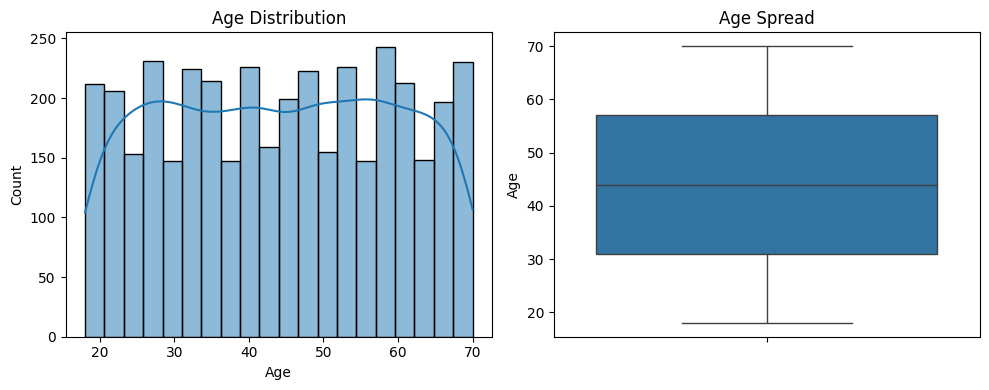

In [6]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Age')
plt.title('Age Spread')
plt.tight_layout()
plt.show()

####Gender Distribution

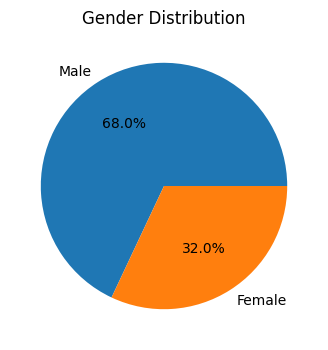

In [7]:
plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

####Top Locations

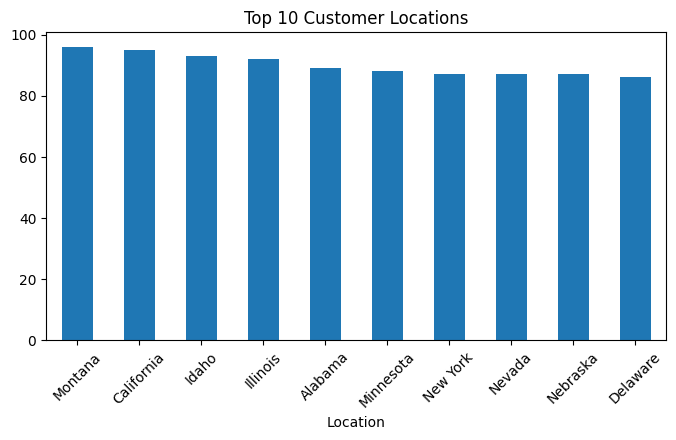

In [8]:
plt.figure(figsize=(8, 4))
df['Location'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Customer Locations')
plt.xticks(rotation=45)
plt.show()

#####Product Categories

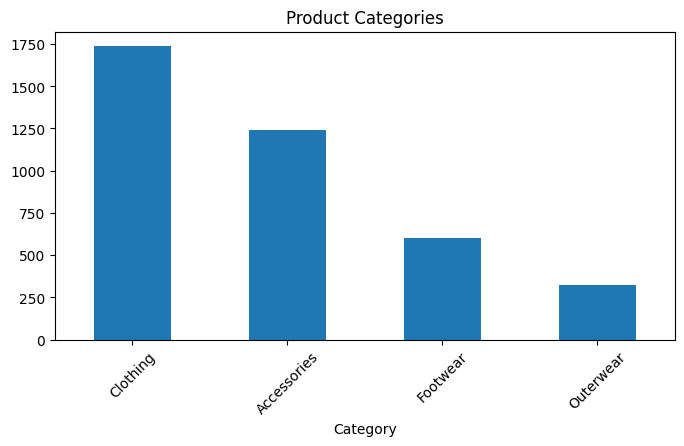

In [9]:
plt.figure(figsize=(8, 4))
df['Category'].value_counts().plot(kind='bar')
plt.title('Product Categories')
plt.xticks(rotation=45)
plt.show()

#####Purchase Amount Analysis

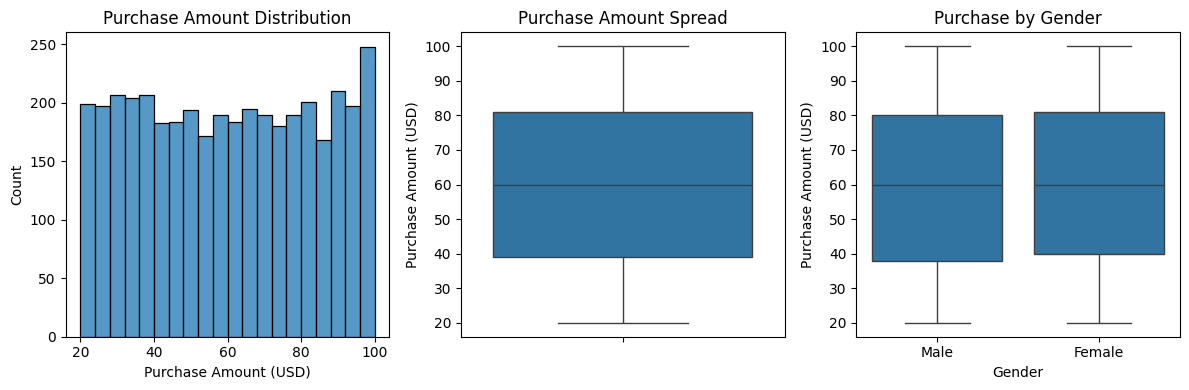

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Purchase Amount (USD)'], bins=20)
plt.title('Purchase Amount Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='Purchase Amount (USD)')
plt.title('Purchase Amount Spread')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)')
plt.title('Purchase by Gender')
plt.tight_layout()
plt.show()

#####Seasonal Trends And Payment Methods

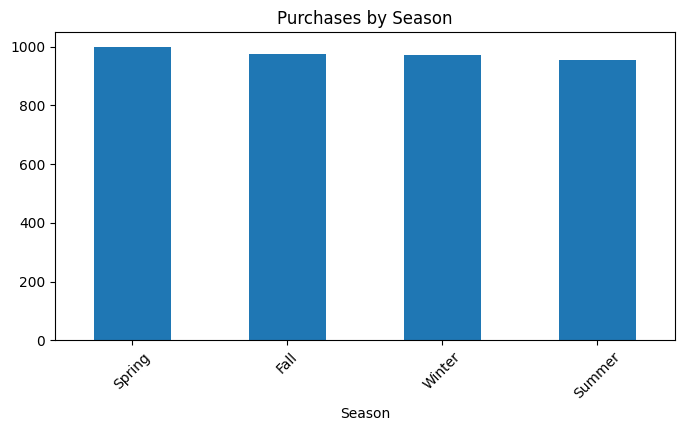

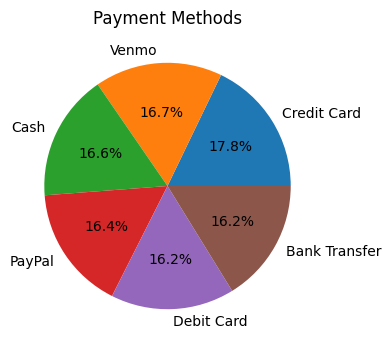

In [12]:
plt.figure(figsize=(8, 4))
df['Season'].value_counts().plot(kind='bar')
plt.title('Purchases by Season')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Methods')
plt.ylabel('')
plt.show()

#####Review Ratings and  Size Preferences

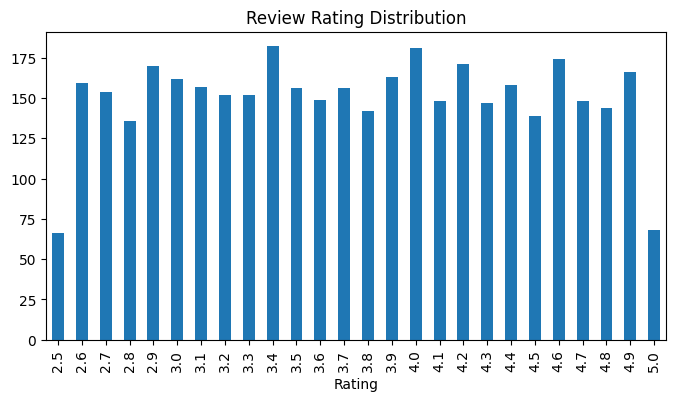

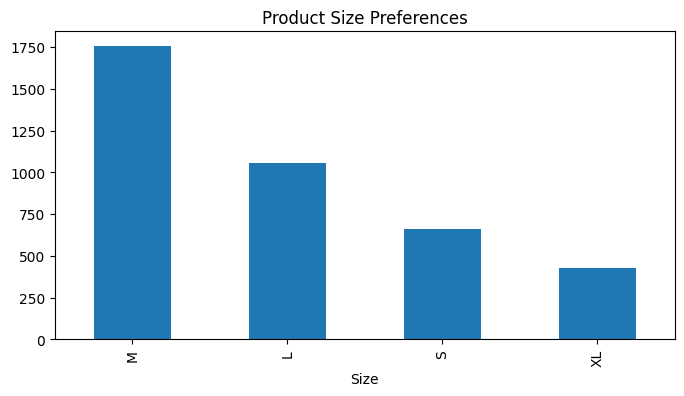

In [13]:
plt.figure(figsize=(8, 4))
df['Review Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Review Rating Distribution')
plt.xlabel('Rating')
plt.show()

plt.figure(figsize=(8, 4))
df['Size'].value_counts().plot(kind='bar')
plt.title('Product Size Preferences')
plt.show()

##### Subscription Status and Correlation Analysis

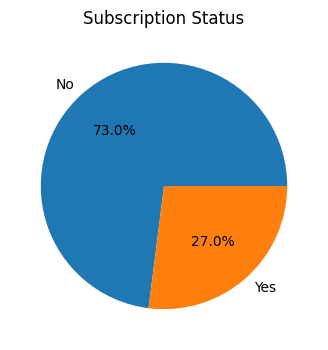

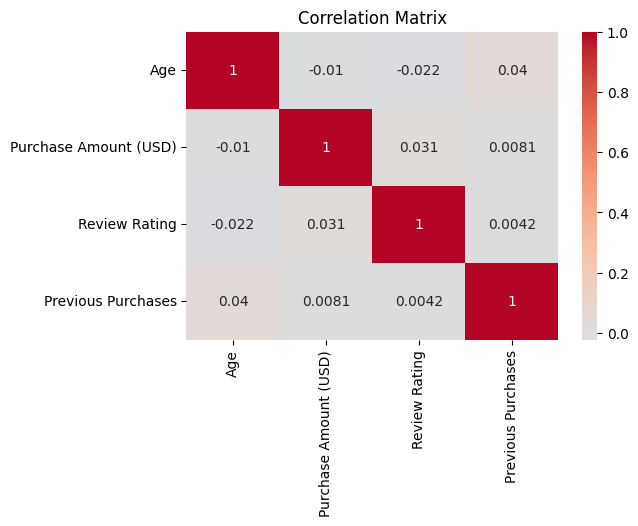

In [14]:
plt.figure(figsize=(6, 4))
df['Subscription Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Subscription Status')
plt.ylabel('')
plt.show()

numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

###Age vs Purchase Amount  || Category vs Purchase Amount


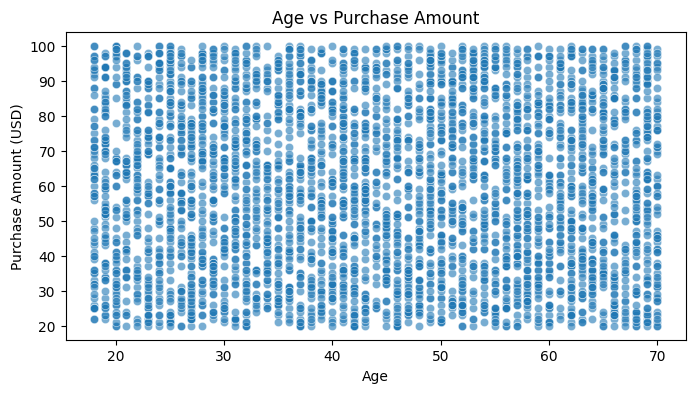

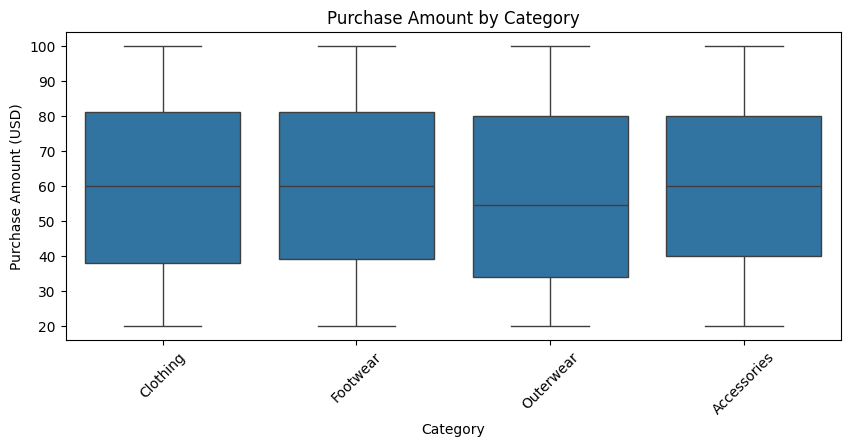

In [15]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', alpha=0.6)
plt.title('Age vs Purchase Amount')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Category', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Category')
plt.xticks(rotation=45)
plt.show()

###Season vs Purchase Amount || Top Colors

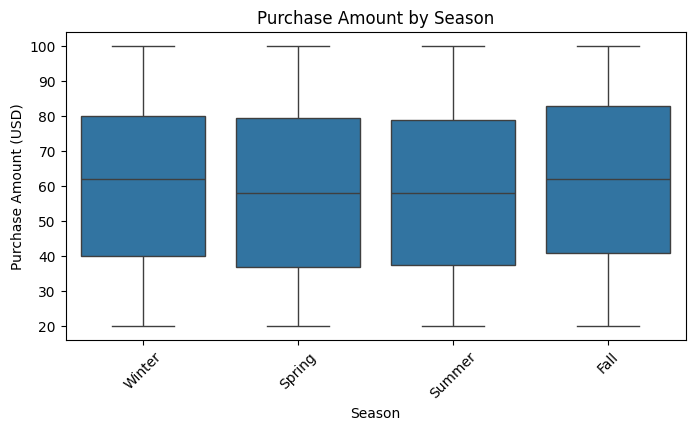

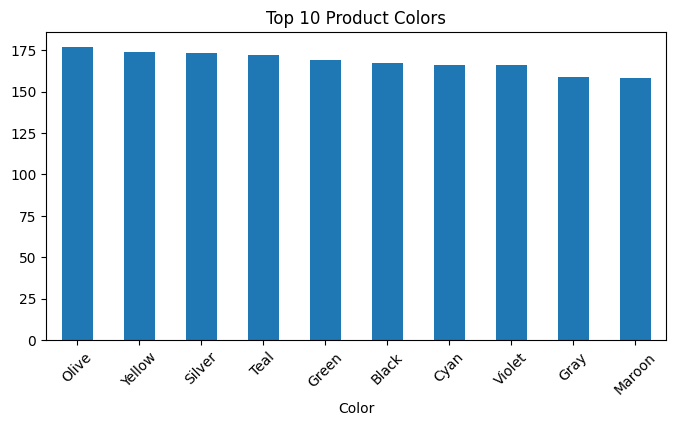

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Season', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Season')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 4))
df['Color'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Product Colors')
plt.xticks(rotation=45)
plt.show()

##### Shipping Types   ||  Previous Purchases Analysis

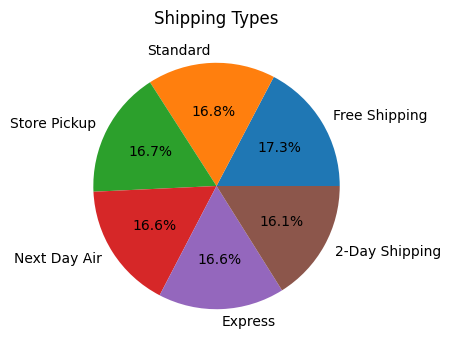

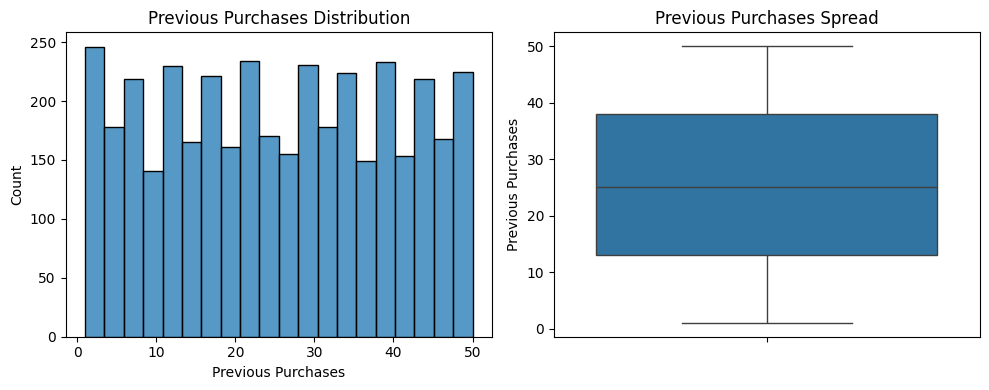

In [17]:
plt.figure(figsize=(6, 4))
df['Shipping Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Shipping Types')
plt.ylabel('')
plt.show()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Previous Purchases'], bins=20)
plt.title('Previous Purchases Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Previous Purchases')
plt.title('Previous Purchases Spread')
plt.tight_layout()
plt.show()

####Check for Duplicates ||  Key Insights Summary

In [18]:
print(f"Duplicate rows: {df.duplicated().sum()}")

print("KEY INSIGHTS:")
print(f"• Total records: {df.shape[0]}")
print(f"• Avg purchase: ${df['Purchase Amount (USD)'].mean():.2f}")
print(f"• Most popular category: {df['Category'].mode().values[0]}")
print(f"• Avg age: {df['Age'].mean():.1f} years")
print(f"• Top location: {df['Location'].mode().values[0]}")
print(f"• Avg rating: {df['Review Rating'].mean():.1f}/5")

Duplicate rows: 0
KEY INSIGHTS:
• Total records: 3900
• Avg purchase: $59.76
• Most popular category: Clothing
• Avg age: 44.1 years
• Top location: Montana
• Avg rating: 3.7/5
